# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de dos modelos con la misma arquitectura entrenados con datos captados con
microcontrolador y con datos de fuentes externas respectivamente.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_model_evaluation

## Parámetros

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/audio/test"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
micro_model_dir = f"{saved_models_dir}/tensorflow/MicroAudioDataModel"
ext_model_dir = f"{saved_models_dir}/tensorflow/ExtAudioDataModel"
label_index_dir = f"{saved_models_dir}/label index mappings"
micro_label_index_path = f"{label_index_dir}/MicroAudioDataModel.joblib"
ext_label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo entrenado con datos obtenidos con microcontrolador
Comprobamos el rendimiento del modelo entrenado con datos obtenidos con microcontrolador con la partición test de los
datos obtenidos con microcontrolador y con la partición test de los datos de origen externo.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/MicroAudioDataModel".
Se usarán 91 muestras.


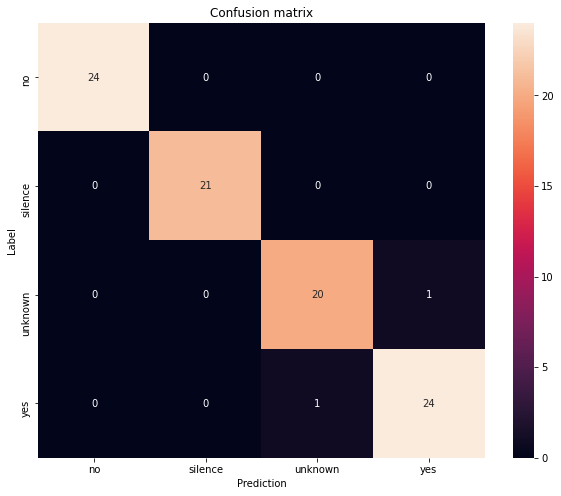

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        24
     silence       1.00      1.00      1.00        21
     unknown       0.95      0.95      0.95        21
         yes       0.96      0.96      0.96        25

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91

Se usarán 3232 muestras.


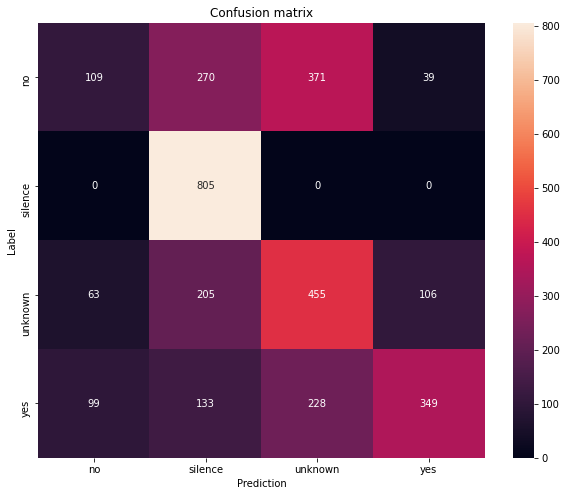

              precision    recall  f1-score   support

          no       0.40      0.14      0.21       789
     silence       0.57      1.00      0.73       805
     unknown       0.43      0.55      0.48       829
         yes       0.71      0.43      0.54       809

    accuracy                           0.53      3232
   macro avg       0.53      0.53      0.49      3232
weighted avg       0.53      0.53      0.49      3232



In [3]:
tensorflow_model_evaluation(micro_model_dir, micro_label_index_path, [micro_data_test_dir, ext_data_test_dir])

## Modelo entrenado con datos de origen externo
Comprobamos el rendimiento del modelo entrenado con datos de origen externo con la partición test de los
datos de origen externo y con el conjunto de imágenes obtenidas con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/ExtAudioDataModel".
Se usarán 3232 muestras.


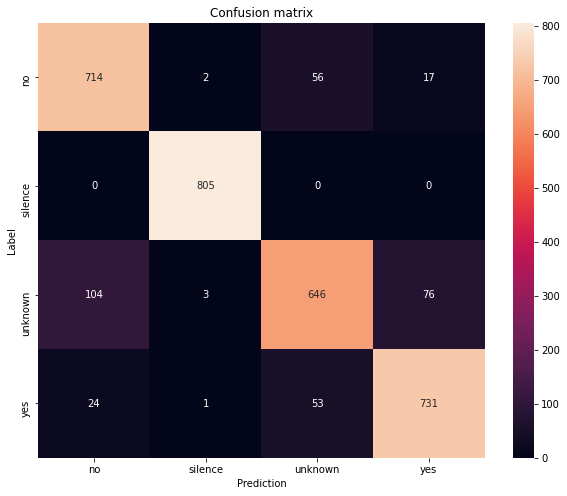

              precision    recall  f1-score   support

          no       0.85      0.90      0.88       789
     silence       0.99      1.00      1.00       805
     unknown       0.86      0.78      0.82       829
         yes       0.89      0.90      0.90       809

    accuracy                           0.90      3232
   macro avg       0.90      0.90      0.90      3232
weighted avg       0.90      0.90      0.90      3232

Se usarán 452 muestras.


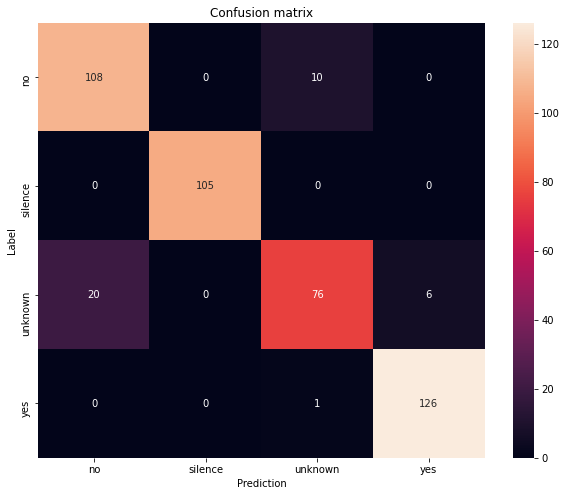

              precision    recall  f1-score   support

          no       0.84      0.92      0.88       118
     silence       1.00      1.00      1.00       105
     unknown       0.87      0.75      0.80       102
         yes       0.95      0.99      0.97       127

    accuracy                           0.92       452
   macro avg       0.92      0.91      0.91       452
weighted avg       0.92      0.92      0.92       452



In [4]:
tensorflow_model_evaluation(ext_model_dir, ext_label_index_path, [ext_data_test_dir, micro_data_all_dir])
